In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## Kicks

In [2]:
kickDF = pd.read_csv('KickingDF.csv')
# kickDF = kickDF.drop(121)
kickDF2 = kickDF[kickDF['FGA'] >= 10]

In [52]:
accMax = kickDF2[(kickDF2.KDi == 90) & (kickDF2.KAc == 100)]
balMax = kickDF2[(kickDF2.KDi == 95) & (kickDF2.KAc == 95)]
powMax = kickDF2[(kickDF2.KDi == 100) & (kickDF2.KAc == 90)]

In [56]:
print('accMax:',accMax.Name.unique())
print('balMax:',balMax.Name.unique())
print('powMax:',powMax.Name.unique())

accMax: ['Turkleton, T.' 'Blewitt, I.' 'Fulture, K.']
balMax: ['McCormick, M.' 'Jackson, D.']
powMax: ['Ronaldo, C.' 'Turkleton, T.']


In [60]:
accMax[accMax.INT >= 90].Name.unique()

array(['Turkleton, T.'], dtype=object)

In [61]:
balMax[balMax.INT >= 85].Name.unique()

array(['McCormick, M.', 'Jackson, D.'], dtype=object)

In [62]:
powMax[powMax.INT >= 80].Name.unique()

array(['Turkleton, T.'], dtype=object)

In [51]:
kickDF2[(kickDF2.KDi == 100) & (kickDF2.KAc == 90)]

,Unnamed: 0,teamID,20-29,30-39,40-49,50+,<20,ACC,AGI,ARM,END,FG%,FGA,FGM,G,HND,INT,KAc,KDi,L,Lng,Name,OVR,PA,PBl,PF,Player,Pos,RBl,S,SPE,STR,T,TCK,Team,W,WPct,XP%,XPA,XPM
28,28,4,5/5,10/11,6/6,1/1,2/2,1.0,30.0,20.0,69.0,96.0,25.0,24.0,14.0,15.0,60.0,90.0,100.0,2,53.0,"Ronaldo, C.",83.0,203,1.0,435,"Ronaldo, C.",P,1.0,4,30.0,25.0,0,15.0,ARI,12,0.857,95.9,49.0,47.0
33,33,1,10/10,9/10,3/4,0/1,1/1,1.0,55.0,20.0,80.0,88.5,26.0,23.0,14.0,15.0,80.0,90.0,100.0,6,44.0,"Turkleton, T.",93.0,340,1.0,405,"Turkleton, T.",K,1.0,5,55.0,50.0,0,19.0,BAL,8,0.571,95.8,48.0,46.0


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
corrDF = kickDF2.corr(method='spearman')
corrDF[['FG%','XP%']].loc[['OVR','KDi', 'KAc', 'END', 'INT', 'STR']].sort_values('FG%',ascending=False)

,FG%,XP%
KDi,0.528311,0.092141
KAc,0.507746,0.155085
OVR,0.477108,0.120856
END,0.333567,0.097628
INT,0.181421,0.087528
STR,0.100788,-0.084036


In [5]:
kickDF2.columns

Index(['Unnamed: 0', 'teamID', '20-29', '30-39', '40-49', '50+', '<20', 'ACC',
       'AGI', 'ARM', 'END', 'FG%', 'FGA', 'FGM', 'G', 'HND', 'INT', 'KAc',
       'KDi', 'L', 'Lng', 'Name', 'OVR', 'PA', 'PBl', 'PF', 'Player', 'Pos',
       'RBl', 'S', 'SPE', 'STR', 'T', 'TCK', 'Team', 'W', 'WPct', 'XP%', 'XPA',
       'XPM'],
      dtype='object')

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
micycleDF = kickDF2.loc[kickDF2.Player == 'McCormick, M.']
deanDF = kickDF2.loc[kickDF2.Player == 'Jackson, D.']
turkDF = kickDF2.loc[kickDF2.Player == 'Turkleton, T.']
fultureDF = kickDF2.loc[kickDF2.Player == 'Fulture, K.']
alexDF = kickDF2.loc[kickDF2.Player == 'Dasistwirklichseinnachname, A.']
fDF = kickDF2.loc[kickDF2.Player == 'Forfeit, N.']
harrisDF = kickDF2.loc[kickDF2.Player == 'Harris, S.']
neoDF = kickDF2.loc[kickDF2.Player == 'Donaldson, N.']

In [63]:
fultureDF.INT.max()

80.0

In [8]:
def plotXY(x,y,saveFig=False):
    fig = plt.figure(figsize=(8,6),facecolor='w')
    plt.rcParams['font.family'] = 'Roboto Mono'
    plt.rcParams['font.weight'] = 'medium'
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='bold')
    plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10)
    plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
    plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
    plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
    plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
    plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='black',marker='>')
    plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
    plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout()
    
    if saveFig:
        plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
        
    plt.show()

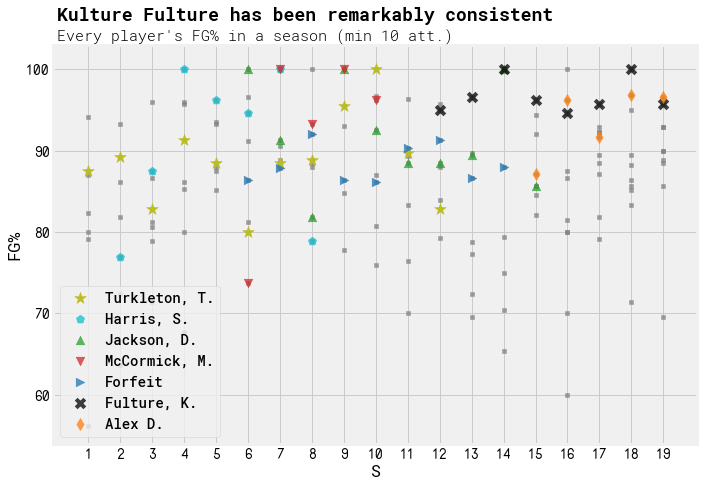

In [88]:
x = 'S'
y = 'FG%'
alph = 0.75
fig = plt.figure(figsize=(10,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=1)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(0,106,'Kulture Fulture has been remarkably consistent',weight='bold',size=18)
plt.text(0,103.5,"Every player's FG% in a season (min 10 att.)",size=15,weight='light')
plt.xticks(range(1,20))
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('images/Kicks-Season.png',facecolor=fig.get_facecolor())
plt.show()

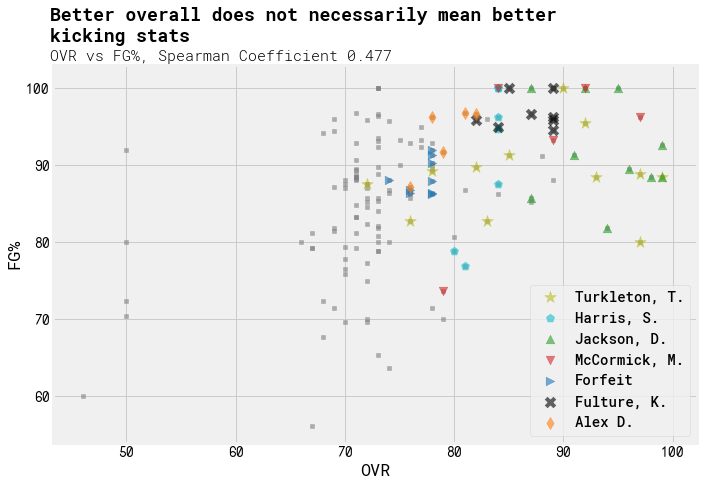

In [89]:
x = 'OVR'
y = 'FG%'
alph = 0.6
fig = plt.figure(figsize=(10,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(43,106,'Better overall does not necessarily mean better \nkicking stats',weight='bold',size=18)
plt.text(43,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

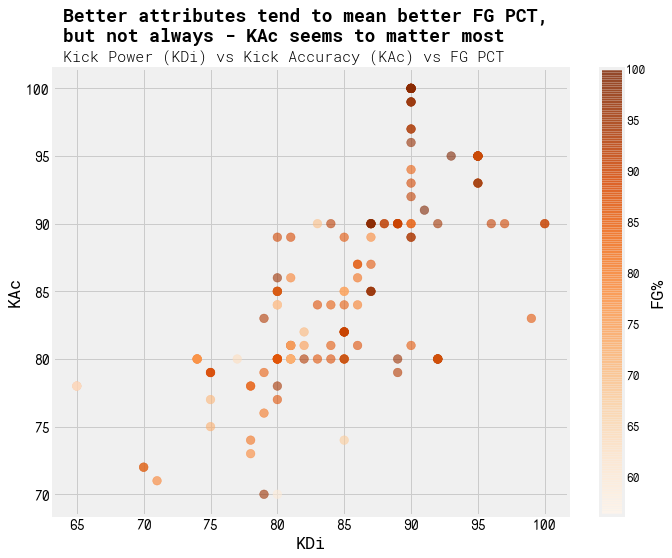

In [10]:
x = 'KDi'
y = 'KAc'
alph = 0.6
cmap = plt.get_cmap('Oranges')
fig = plt.figure(figsize=(10,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],s=75,marker='o',c=kickDF2['FG%'],cmap=cmap,alpha=alph)
plt.text(64,103.5,'Better attributes tend to mean better FG PCT,\nbut not always - KAc seems to matter most',weight='bold',size=18)
plt.text(64,102,'Kick Power (KDi) vs Kick Accuracy (KAc) vs FG PCT',size=15,weight='light')
cbar = plt.colorbar()
cbar.set_label('FG%')
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontfamily('NovaMono')
    l.set_weight("light")
    l.set_fontsize(12)
plt.xlabel(x)
plt.ylabel(y)
# plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%('KDi','KAc'),facecolor=fig.get_facecolor())
plt.show()

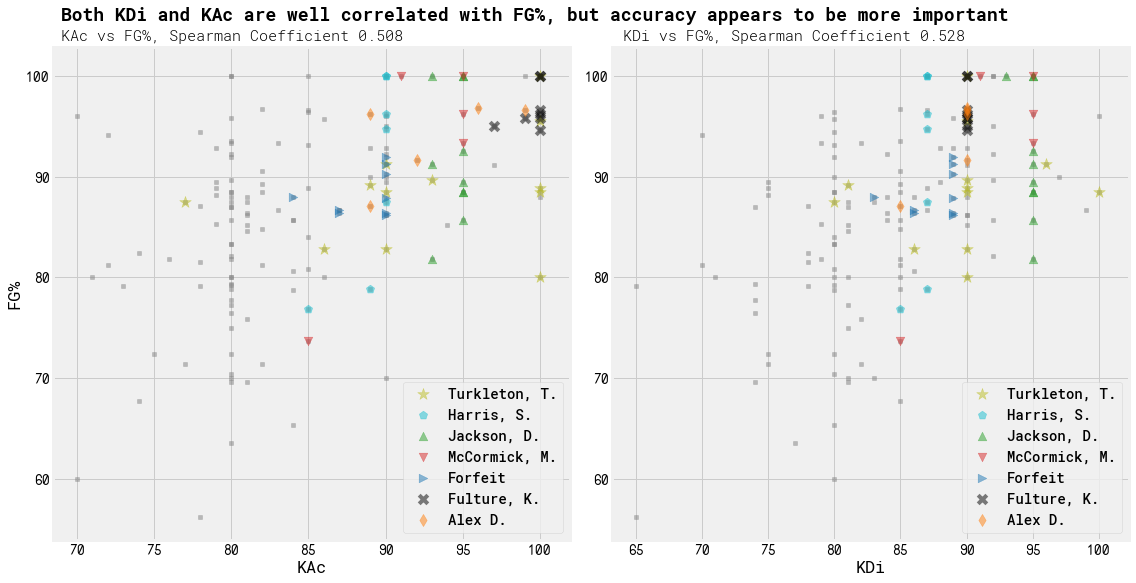

In [92]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'FG%'
alph = 0.5
statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.figtext(0.06,0.99,'Both KDi and KAc are well correlated with FG%, but accuracy appears to be more important',weight='bold',size=18)

x = 'KAc'
plt.text(69,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='light',size=15)
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'

plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.text(64,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='light',size=15)
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
# plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/FG-split-KAc-KDi.png',facecolor=statPlt.get_facecolor(),bbox_inches='tight')
plt.show()

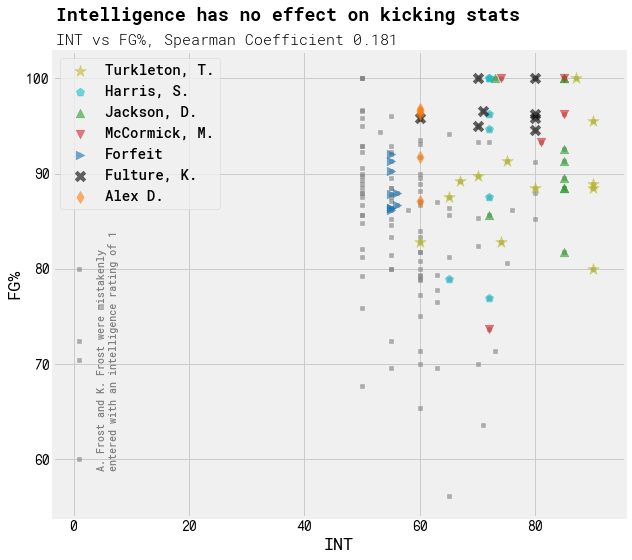

In [91]:
x = 'INT'
y = 'FG%'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(-3,106,'Intelligence has no effect on kicking stats',weight='bold',size=18)
plt.text(-3,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),size=15,weight='light')
plt.text(4,59,'A. Frost and K. Frost were mistakenly \nentered with an intelligence rating of 1',c='gray',size=10,rotation=90)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

In [109]:
acc100 = kickDF2[kickDF2.KAc == 100]
acc100[['Name','FGA','FGM','FG%','40-49','50+','PF','KAc','KDi','INT','END','OVR','WPct']].sort_values('FG%',ascending=False)

,Name,FGA,FGM,FG%,40-49,50+,PF,KAc,KDi,INT,END,OVR,WPct
71,"Blewitt, I.",32.0,32.0,100.0,12/12,3/3,530,100.0,90.0,80.0,71.0,89.0,0.857
72,"Turkleton, T.",30.0,30.0,100.0,7/7,1/1,486,100.0,90.0,87.0,70.0,90.0,0.929
110,"Fulture, K.",24.0,24.0,100.0,8/8,1/1,337,100.0,90.0,80.0,80.0,89.0,0.643
149,"Fulture, K.",27.0,27.0,100.0,6/6,1/1,300,100.0,90.0,70.0,70.0,85.0,0.385
102,"Fulture, K.",29.0,28.0,96.6,5/5,6/6,413,100.0,90.0,71.0,80.0,87.0,0.571
118,"Fulture, K.",26.0,25.0,96.2,7/8,1/1,340,100.0,90.0,80.0,80.0,89.0,0.571
139,"Fulture, K.",24.0,23.0,95.8,6/7,0/0,336,100.0,90.0,80.0,80.0,89.0,0.615
64,"Turkleton, T.",22.0,21.0,95.5,6/6,1/2,473,100.0,90.0,90.0,79.0,92.0,0.786
129,"Fulture, K.",37.0,35.0,94.6,8/8,1/3,307,100.0,90.0,80.0,80.0,89.0,0.769
56,"Turkleton, T.",18.0,16.0,88.9,2/4,1/1,403,100.0,90.0,90.0,82.0,97.0,0.500


In [108]:
acc100.corr('spearman')['FG%']

Unnamed: 0    0.632373
teamID        0.443629
ACC                NaN
AGI          -0.641006
ARM                NaN
END          -0.610723
FG%           1.000000
FGA           0.367850
FGM           0.655561
G            -0.123698
HND           0.375567
INT          -0.568377
KAc                NaN
KDi                NaN
L            -0.510553
Lng           0.372881
OVR          -0.586937
PA           -0.323151
PBl                NaN
PF            0.256292
RBl                NaN
S             0.624341
SPE          -0.641006
STR          -0.643232
T                  NaN
TCK                NaN
W             0.535213
WPct          0.524557
XP%           0.316464
XPA           0.223478
XPM           0.255603
Name: FG%, dtype: float64

In [14]:
turk100 = acc100[acc100.Name == 'Turkleton, T.']
blewitt100 = acc100[acc100.Name == 'Blewitt, I.']
fulture100 = acc100[acc100.Name == 'Fulture, K.']

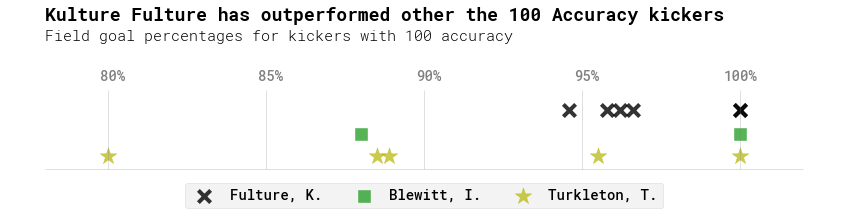

In [38]:
x = 'KAc'
y = 'FG%'
alph = 0.8
fig = plt.figure(figsize=(12,4),facecolor='w')
plt.axis('off')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.hlines(100,78,102,color='gray',alpha=0.5,lw=0.5)
plt.vlines(80,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(80,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(79.75,102.25,'80%',color='gray')
plt.vlines(85,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(85,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(84.75,102.25,'85%',color='gray')
plt.vlines(90,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(90,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(89.75,102.25,'90%',color='gray')
plt.vlines(95,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(95,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(94.75,102.25,'95%',color='gray')
plt.vlines(100,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(100,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(99.5,102.25,'100%',color='gray')
plt.scatter(fulture100[y],fulture100[x]+1.5,label='Fulture, K.',s=150,c='k',marker='x',alpha=alph)
plt.scatter(blewitt100[y],blewitt100[x]+.888,marker=',',c='tab:green',s=150,alpha=alph,label='Blewitt, I.')
plt.scatter(turk100[y],turk100[x]+.33,label='Turkleton, T.',s=300,c='tab:olive',marker='*',alpha=alph)
plt.text(78,103.75,'Kulture Fulture has outperformed other the 100 Accuracy kickers',weight='bold',size=18)
plt.text(78,103.25,'Field goal percentages for kickers with 100 accuracy',size=15,weight='light')
plt.xlabel(y)
plt.ylabel(x)
# plt.ylim(90,110)
plt.legend(ncol=3,loc=8)
plt.tight_layout()
plt.savefig('images/100Accuracy.png',facecolor=fig.get_facecolor(),bbox_inches='tight')
plt.show()

In [19]:
fg100df = kickDF2.loc[kickDF2['FG%'] == 100]
fg100df[['Name','S','Team','W','L','FGM','FG%','XPM','XP%','KDi','KAc']].sort_values(['XP%','S'],ascending=[False,True]).set_index('Name').to_csv('FG100.csv')

## Punts

In [20]:
puntDF = pd.read_csv('PuntingDF.csv')
puntDF2 = puntDF[puntDF.Punts >= 20]

In [21]:
puntDF2.columns

Index(['Unnamed: 0', 'teamID', 'ACC', 'AGI', 'ARM', 'Avg', 'END', 'G', 'HND',
       'INT', 'Inside 20', 'KAc', 'KDi', 'L', 'Long', 'Name', 'OVR', 'PA',
       'PBl', 'PF', 'Player', 'Pos', 'Punts', 'RBl', 'S', 'SPE', 'STR', 'T',
       'TCK', 'Team', 'W', 'WPct', 'Yds'],
      dtype='object')

In [32]:
corrPuntDF = puntDF2.corr(method='spearman')
# corrPuntDF
corrPuntDF[['Avg','Long','Inside 20']].loc[['OVR','KDi', 'KAc', 'END', 'INT', 'STR']].sort_values('Avg',ascending=False)

,Avg,Long,Inside 20
KDi,0.714485,0.750504,0.047450
OVR,0.575455,0.621622,0.147642
KAc,0.537110,0.572156,0.067486
END,0.357573,0.355491,0.118022
INT,0.218413,0.264040,0.154389
STR,0.155612,0.227602,0.155699


In [34]:
corrPuntDF.sort_values('Inside 20',ascending=False)['Inside 20']

Inside 20     1.000000
Yds           0.590486
Punts         0.584282
G             0.333597
T             0.158628
STR           0.155699
INT           0.154389
OVR           0.147642
Long          0.146227
AGI           0.130014
Avg           0.122531
END           0.118022
L             0.085047
SPE           0.078111
KAc           0.067486
HND           0.061959
KDi           0.047450
TCK           0.035281
ARM          -0.000326
PA           -0.003977
teamID       -0.039107
ACC          -0.053449
W            -0.061752
WPct         -0.072946
PF           -0.085710
PBl          -0.135281
RBl          -0.135356
Unnamed: 0   -0.355418
S            -0.355465
Name: Inside 20, dtype: float64

In [39]:
pmicycleDF = puntDF2.loc[puntDF2.Player == 'McCormick, M.']
pdeanDF = puntDF2.loc[puntDF2.Player == 'Jackson, D.']
pturkDF = puntDF2.loc[puntDF2.Player == 'Turkleton, T.']
pfultureDF = puntDF2.loc[puntDF2.Player == 'Fulture, K.']
palexDF = puntDF2.loc[puntDF2.Player == 'Dasistwirklichseinnachname, A.']
pfDF = puntDF2.loc[puntDF2.Player == 'Forfeit, N.']
pharrisDF = puntDF2.loc[puntDF2.Player == 'Harris, S.']
pneoDF = puntDF2.loc[puntDF2.Player == 'Donaldson, N.']

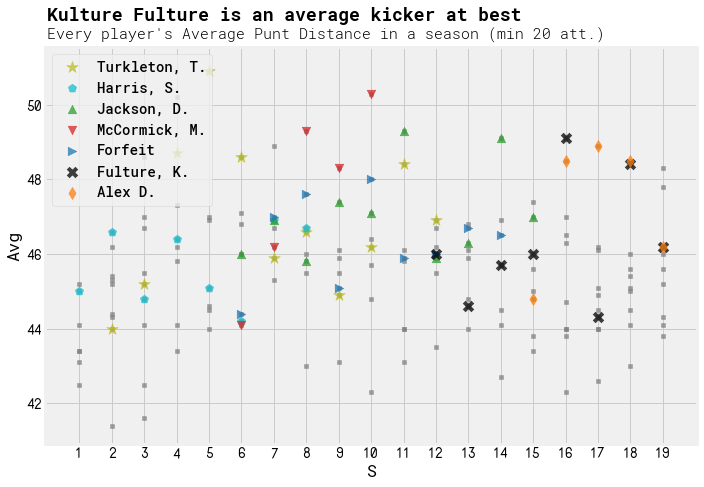

In [134]:
x = 'S'
y = 'Avg'
alph = 0.75
fig = plt.figure(figsize=(10,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(0,52.25,'Kulture Fulture is an average kicker at best',weight='bold',size=18)
plt.text(0,51.75,"Every player's Average Punt Distance in a season (min 20 att.)",size=15,weight='light')
plt.xticks(range(1,20))
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('images/Punts-Season.png',facecolor=fig.get_facecolor())
plt.show()

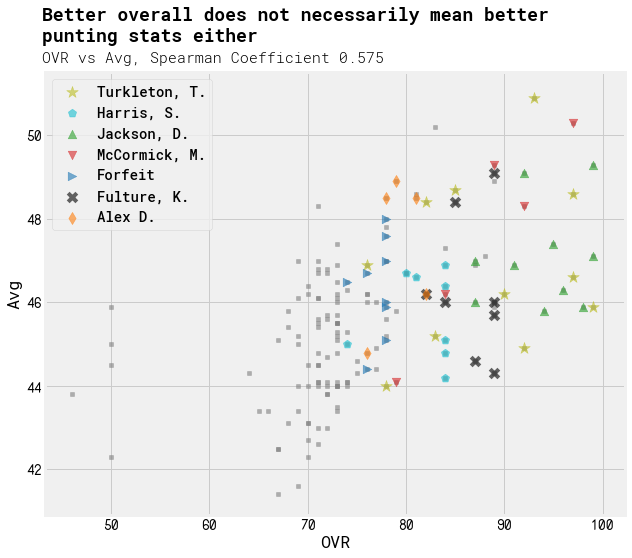

In [111]:
x = 'OVR'
y = 'Avg'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(43,52.25,'Better overall does not necessarily mean better \npunting stats either',weight='bold',size=18)
plt.text(43,51.75,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Punt-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

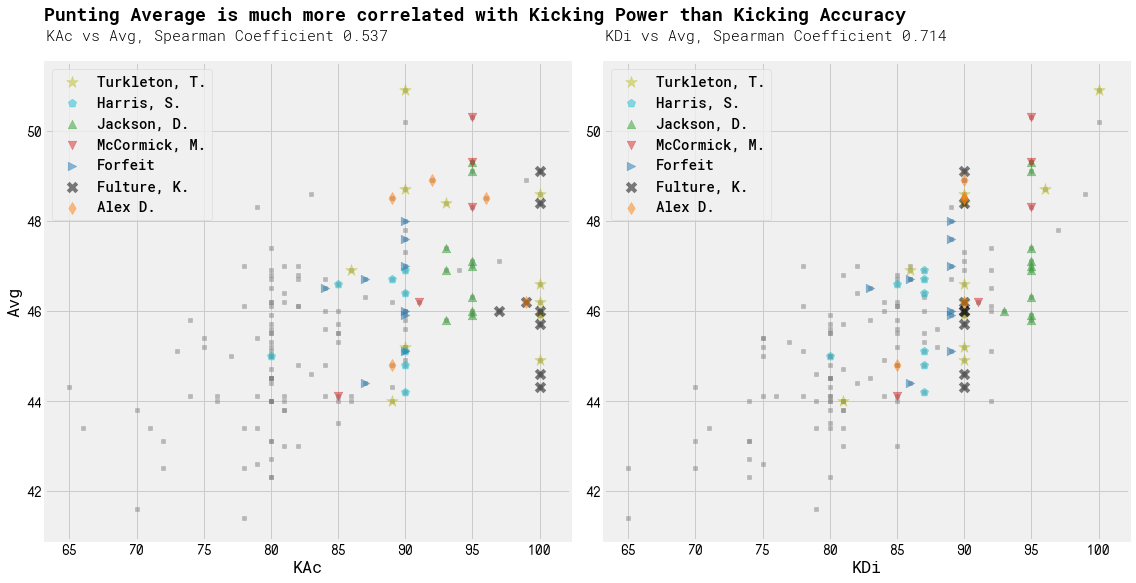

In [125]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'Avg'
alph = 0.5
statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.figtext(0.045,0.99,'Punting Average is much more correlated with Kicking Power than Kicking Accuracy',weight='bold',size=18)

x = 'KAc'
plt.text(63.25,52,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='light',size=15)
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'

plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.text(63.25,52,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='light',size=15)
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
# plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/Punt-Avg-KAc-KDi.png',facecolor=statPlt.get_facecolor(),bbox_inches='tight')
plt.show()

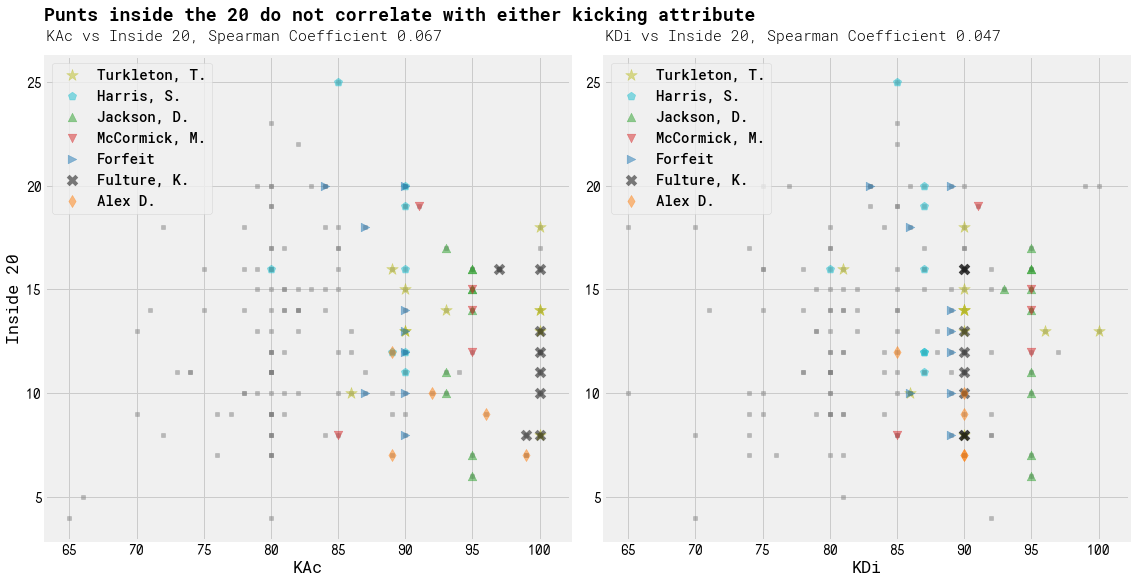

In [27]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'Inside 20'
alph = 0.5
statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.figtext(0.045,0.99,'Punts inside the 20 do not correlate with either kicking attribute',weight='bold',size=18)

x = 'KAc'
plt.text(63.25,27,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='light',size=15)
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'

plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.text(63.25,27,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='light',size=15)
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
# plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/Punt-In20-KAc-KDi.png',facecolor=statPlt.get_facecolor(),bbox_inches='tight')
plt.show()

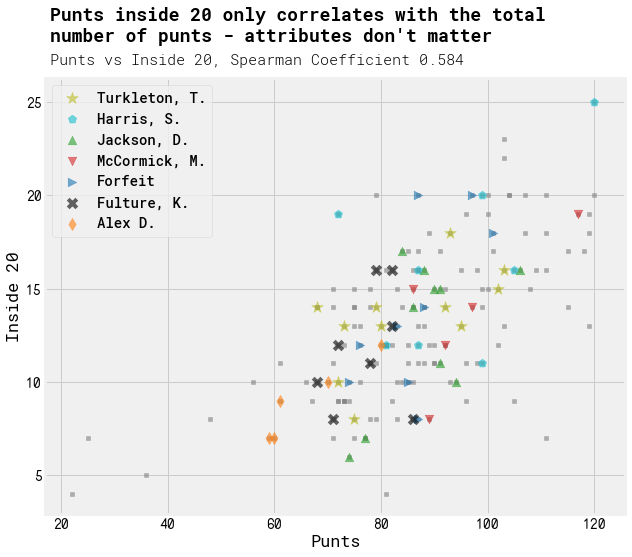

In [31]:
x = 'Punts'
y = 'Inside 20'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(18,28.25,"Punts inside 20 only correlates with the total \nnumber of punts - attributes don't matter",weight='bold',size=18)
plt.text(18,27,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Punt-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

In [29]:
# print('turk')
turkDF[['S','KAc','KDi','FG%','XP%']].to_csv('turk.csv')
pturkDF[['S','KAc','KDi','Avg','Long']].to_csv('turkP.csv')

In [30]:
# print('fulture')
fultureDF[['S','KAc','KDi','FG%','XP%']].to_csv('fulture.csv')
pfultureDF[['S','KAc','KDi','Avg','Long']].to_csv('fultureP.csv')

## Stats